# BATTLE OF NEIGHBORHOODS QUITO -  ECUADOR

## IBM APPLIED DATA SCIENCE - CAPSTONE FINAL PROJECT

## Opening a Sweet Bakery in Quito - better business opportunity based on competition

### JESSICA FOURNEY M. 

#### NOV - 2020

## INTRODUCTION

### 1.	Background

Ecuador officially known as the Republic of Ecuador is a country in northwestern South America, border by Colombia on the north, Peru on the East and South and the Pacific Ocean on the West. 
Quito is the capital of Ecuador, the country's most populated city with around 1’874,000,000 population. Quito is located in the highlands of Ecuador at an elevation of 2,850 metres (9,350 ft) above sea level; it is the second-highest official capital city in the world. 

The historic centre or Old Town of Quito is one of the largest, least altered and best-preserved in the Americas. 

Quito doesn´t have specific either extreme seasons. It can be really warm/hot and rainy the same day. People are very traditional and love having afternoon coffees every day which usually is accompanied with bread and pastries. So you can find Bread bakeries in every neighborhood however the bakeries specialized in sweet pastries are not very common.  

Quito tourism numbers exceeded half a million visitors in the first nine months of 2019, 48% of all arrivals in Ecuador, which is 5% more than the number of visitors recorded in the first nine months of the previous year. 

For entrepreneurs looking to investing in business like specialty cafes and bake shops would be a great opportunity considering the locals and tourist visitors.


### 2.	 Business Problem

Given that Quito is a very traditional city and that as I mentioned before there is Bread stores (Bakeries) in almost each neighborhood, we need to figure out what will be the best location to open a Sweet Bakery (Sweet pastries) business. We will be focusing our audience to crowded and busy locations as they are the “new” downtown and the Old Town. 
To choose the best location of the city we need to compare the neighborhoods particularly the “new” downtown where most business of the financial district are located, and the historic center or Old Town. We will need to find out where are most business located and their categories to find out the best business opportunity.


## DATA

I will briefly describe the two neighborhoods selected for the comparison.

Quito downtown
This is the modern Quito, with high-rise buildings, shopping centers, the financial district, and upper-class residential areas and some working-class housing areas. This modern area is the city's entertainment hub. It is a meeting point for both residents and tourists. Its cosmopolitan atmosphere is expressed in a wide variety of culinary, artistic, and cultural options, and the large number of hotels, inns, travel agencies, shops, bars, and discothèques that light up when the sun sets.
Quito Historic Centre – Old Town
Quito has the largest, least altered, and best-preserved historic center in the Americas. This center was, together with the historic center of Kraków in Poland, the first to be declared a World Heritage Site by UNESCO on 18 September 1978. There are about 130 monumental buildings (which host a variety of pictorial art and sculpture, mostly religiously inspired, in a multi-faceted range of schools and styles), and 5,000 properties registered in the municipal inventory of heritage properties.

Foursquare API:
I will be using the Foursquare API to explore the nearby venues for both neighborhoods to find the most accurate place to open the Shop. I looked for venues up to 2km range from the latitude and longitude of neighborhoods
From the foursquare API, I will be retrieving the following for each nearby venue: 

•	Name 
•	Category 
•	Latitude
•	Longitude


## Importing libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
! pip install geocoder
! pip install geopy
! pip install BeautifulSoup4
!pip install folium
import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
# library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print("Libraries imported.")

     |████████████████████████████████| 98 kB 8.7 MB/s  eta 0:00:01
     |████████████████████████████████| 93 kB 3.9 MB/s  eta 0:00:01
Libraries imported.


In [2]:

! pip install beautifulsoup4
from bs4 import BeautifulSoup

import folium

In [3]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

In [5]:
!pip install geopy

In [6]:
address = 'La Carolina, Quito, Ecuador'

#geolocator = Nominatim()
geolocator = Nominatim(user_agent="http")


location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Quito home are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Quito home are -0.1831335, -78.4844205.


##Quito - Ecuador

In [7]:
KSU_LATITUDE = -0.1831335
KSU_LONGITUDE = -78.4844205
print('The geograpical coordinates of Quito are {}, {}.'.format(KSU_LATITUDE, KSU_LONGITUDE))

The geograpical coordinates of Quito are -0.1831335, -78.4844205.


##Location of Downtown Quito -  Folium Map

In [8]:
!pip install folium

In [9]:
import folium
ksu_map = folium.Map(location = [KSU_LATITUDE, KSU_LONGITUDE], zoom_start = 15)
folium.Marker([KSU_LATITUDE, KSU_LONGITUDE]).add_to(ksu_map)

ksu_map

In [10]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
limit= 100 
radius= 2000

## FORSQUARE API

In [12]:
CLIENT_ID = 'GUCQFRNNVC235LWP2PZE3H2MAX5Q4Q1EUULGPXEBD22ABAM1' # your Foursquare ID
CLIENT_SECRET = 'UKJ0ACTS3R3AI0R1YNNHELHFV1CL4ZKTWWVWMHYEFKN0SXTA' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GUCQFRNNVC235LWP2PZE3H2MAX5Q4Q1EUULGPXEBD22ABAM1
CLIENT_SECRET:UKJ0ACTS3R3AI0R1YNNHELHFV1CL4ZKTWWVWMHYEFKN0SXTA


In [13]:

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        KSU_LATITUDE, 
                                                                        KSU_LONGITUDE, 
                                                                        radius,
                                                                        limit)
                                                            
url

'https://api.foursquare.com/v2/venues/explore?&client_id=GUCQFRNNVC235LWP2PZE3H2MAX5Q4Q1EUULGPXEBD22ABAM1&client_secret=UKJ0ACTS3R3AI0R1YNNHELHFV1CL4ZKTWWVWMHYEFKN0SXTA&v=20180604&ll=-0.1831335,-78.4844205&radius=2000&limit=100'

## QUITO - ECUADOR DOWNTOWN

In [14]:

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fc005f5d268be16697690eb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Parque la Carolina',
  'headerFullLocation': 'Parque la Carolina, Quito',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 126,
  'suggestedBounds': {'ne': {'lat': -0.165133481999982,
    'lng': -78.46645399831846},
   'sw': {'lat': -0.201133518000018, 'lng': -78.50238700168154}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4dbc4730a86e0e98a1df41ff',
       'name': 'Parque La Carolina',
       'location': {'address': 'Av. de los Shirys & Av. Rio Amazonas',
        'crossStreet': 'Av. NN.UU. & Av. Eloy Alfaro',
        'lat': -0.18350569823489743,
    

## IMPORTING DATA FRAME

In [15]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Parque La Carolina,Park,-0.183506,-78.484440
1,Restaurante Ópera,French Restaurant,-0.183607,-78.481155
2,Cosa Nostra Trattoria,Italian Restaurant,-0.184815,-78.480762
3,Corfú,Ice Cream Shop,-0.181578,-78.481249
4,Lucía Pie House & Grill,Pie Shop,-0.183717,-78.481240
5,Chicberry,Ice Cream Shop,-0.181021,-78.480118
6,Europa Café,Coffee Shop,-0.183643,-78.480667
7,Cyril,Dessert Shop,-0.183930,-78.479529
8,Espigon 593,Peruvian Restaurant,-0.180242,-78.480820
9,Cyrano,Bakery,-0.181446,-78.481109


In [16]:
locations = nearby_venues[['lat', 'lng']]
locationlist = locations.values.tolist()
len(locationlist)

100

### 100 NEARBY VENUES

In [17]:
#locationlist[7]
mapUIO = folium.Map(location=[KSU_LATITUDE, KSU_LONGITUDE], zoom_start=14)

for point in range(0, len(locationlist)):
    #folium.RegularPolygonMarker(locationlist[point], line_color='#3186cc',fill_color='#3186cc', popup=nearby_venues['name'][point]).add_to(mapUIO)
    folium.CircleMarker(
        locationlist[point],
        number_of_sides=4,
        radius=5,
        popup=nearby_venues['name'][point],
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7,
    ).add_to(mapUIO) 
mapUIO

### IMPORTING UNIQUE CATEGORIES

In [18]:
KSU_categories= nearby_venues['categories']
KSU_categories_df = pd.DataFrame(KSU_categories)
KSU_categories_df

,categories
0,Park
1,French Restaurant
2,Italian Restaurant
3,Ice Cream Shop
4,Pie Shop
5,Ice Cream Shop
6,Coffee Shop
7,Dessert Shop
8,Peruvian Restaurant
9,Bakery


In [19]:
KSU_unique_categories=pd.DataFrame(KSU_categories_df.categories.unique())
KSU_unique_categories_counts= nearby_venues["categories"].value_counts

In [20]:
KSU_unique_categories_counts
KSU_unique_categories.count()

0    52
dtype: int64

### CATEGORIES COUNT

In [21]:
KSU_unique_categories_counts=pd.DataFrame(nearby_venues['categories'].value_counts())
KSU_unique_categories_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

KSU_unique_categories_counts.index.name ='Categories'
KSU_unique_categories_counts

,value_counts
Categories,
Italian Restaurant,8
Bakery,7
Coffee Shop,6
French Restaurant,4
Ice Cream Shop,4
Café,4
Sushi Restaurant,4
Supermarket,3
Peruvian Restaurant,3


### MOST RELEVANT AREAS CLUSTERS

In [22]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(locationlist)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1,
       0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2,
       0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2,
       0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2], dtype=int32)

In [23]:
# add Cluster number to locations
#np.concatenate((locations,kmeans.labels_[:,None]),axis=1)
locations_clusters = np.column_stack((locations, kmeans.labels_))
#locations_clusters

In [24]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[KSU_LATITUDE, KSU_LONGITUDE], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
colors_array = cm.gnuplot(np.linspace(0, 1, len(ys)))      #palette of colors
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for point in range(0, len(locations_clusters)):
    location = np.append(locations_clusters[point][0],locations_clusters[point][1])
    cluster = int(locations_clusters[point][2])
    label = folium.Popup(str(nearby_venues['name'][point]) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        location,
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6,
    ).add_to(map_clusters) 
map_clusters

In [25]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


### CATEGORIES PLOTT

<function matplotlib.pyplot.show(*args, **kw)>

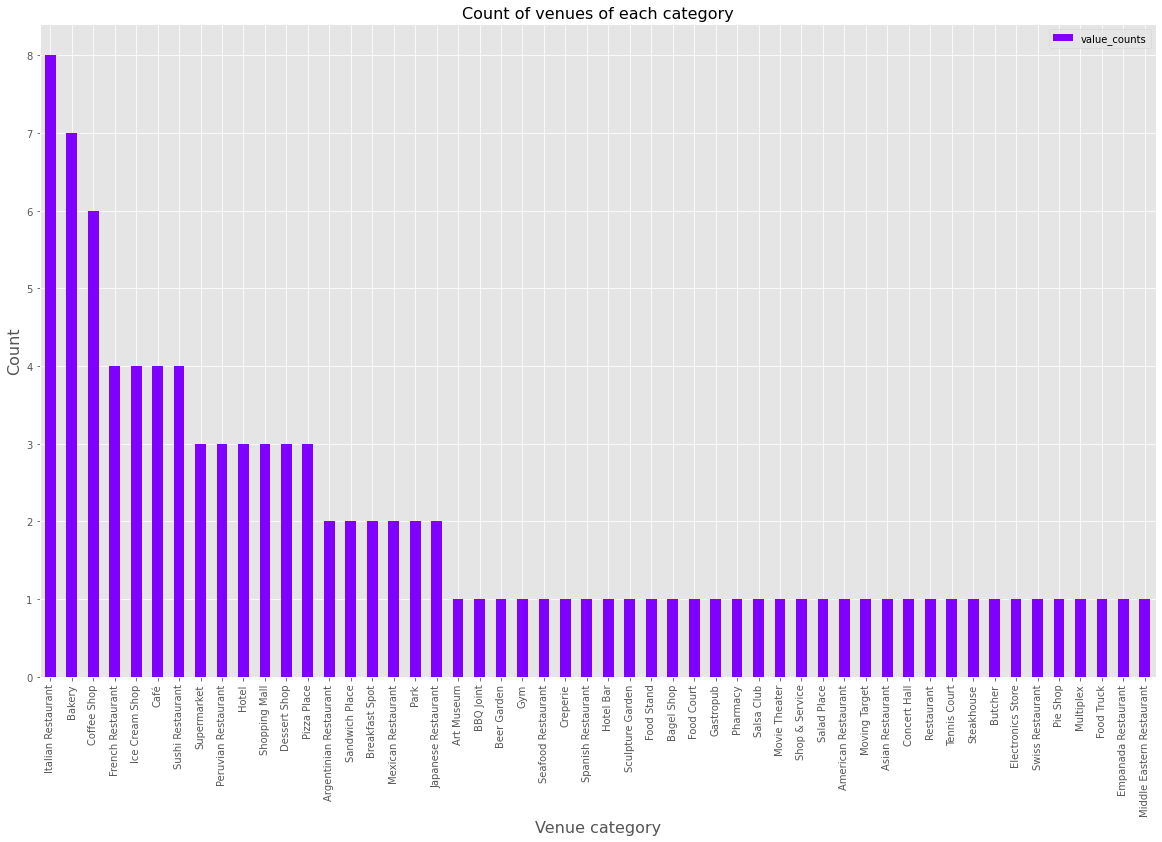

In [26]:
colors = cm.rainbow(np.linspace(0, 1, len(KSU_unique_categories_counts.index)))

KSU_unique_categories_counts.plot(kind='bar', figsize=(20,12), color= colors)


plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)

plt.show

### SEPARATING BAKERIES, DESSERT SHOPS, CREPERIES, CAFE AND COFFEE SHOPS

In [27]:
KSU_categories_df

,categories
0,Park
1,French Restaurant
2,Italian Restaurant
3,Ice Cream Shop
4,Pie Shop
5,Ice Cream Shop
6,Coffee Shop
7,Dessert Shop
8,Peruvian Restaurant
9,Bakery


In [28]:
SweetBakeries= KSU_categories_df[KSU_categories_df['categories'].str.contains("Bakery|Coffee Shop|Café|Dessert Shop|Pie Shop|Creperies")]

SweetBakeries


,categories
4,Pie Shop
6,Coffee Shop
7,Dessert Shop
9,Bakery
15,Coffee Shop
19,Coffee Shop
24,Café
29,Bakery
31,Bakery
32,Bakery


In [29]:
Bak_counts= pd.DataFrame(SweetBakeries['categories'].value_counts())
Bak_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

Bak_counts.index.name ='Categories'
Bak_counts.astype('int')
Bak_counts.sum()

value_counts    21
dtype: int64

### FILTERING AND UNIFYING CATEGORIES

In [30]:
shops = KSU_categories_df[KSU_categories_df['categories'].str.contains("Bakery|Coffee Shop|Café|Dessert Shop|Pie Shop|Creperies")]

KSU_shops_counts= pd.DataFrame(shops['categories'].value_counts())
KSU_shops_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

shops.index.name ='Categories'
KSU_shops_counts

,value_counts
Bakery,7
Coffee Shop,6
Café,4
Dessert Shop,3
Pie Shop,1


### SWEET BAKERIES SHOPS COUNT IN DOWNTOWN

In [31]:
coffee =KSU_categories_df[KSU_categories_df['categories'].str.contains("Bakery|Coffee Shop|Café|Dessert Shop|Pie Shop|Creperies")]


KSU_coffee_counts= pd.DataFrame(coffee['categories'].value_counts())
KSU_coffee_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

coffee.index.name ='Categories'
KSU_coffee_counts



cafe =KSU_categories_df[KSU_categories_df['categories'].str.contains("Bakery|Coffee Shop|Café|Dessert Shop|Pie Shop|Creperies")]


KSU_cafe_counts= pd.DataFrame(cafe['categories'].value_counts())
KSU_cafe_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

cafe.index.name ='Categories'
KSU_cafe_counts

frames = [KSU_cafe_counts, KSU_coffee_counts]

SweetBakeriesShops = pd.concat(frames)
SweetBakeriesShops

,value_counts
Bakery,7
Coffee Shop,6
Café,4
Dessert Shop,3
Pie Shop,1
Bakery,7
Coffee Shop,6
Café,4
Dessert Shop,3
Pie Shop,1


In [32]:
SweetBakeriesShops.sum()


value_counts    42
dtype: int64

## As a result we notice that we can find 42 Sweet Bakeries in Quito Dowtown

## QUITO - ECUADOR OLD TOWN

In [33]:
address = 'Quito, Ecuador'

geolocator = Nominatim(user_agent="http"
                      )
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Quito -Centro Historico are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Quito -Centro Historico are -0.2606019, -78.5494226.


In [34]:
IMU_LATITUDE = -0.2201641
IMU_LONGITUDE = -78.5123274

### IMPORT FOLIUM MAP OF OLD TOWN LOCATION

In [35]:
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        IMU_LATITUDE, 
                                                                        IMU_LONGITUDE, 
                                                                        radius,
                                                                        limit)

In [36]:
results2= requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5fc005f7ac80632fab3944d5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Centro Histórico',
  'headerFullLocation': 'Centro Histórico, Quito',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 96,
  'suggestedBounds': {'ne': {'lat': -0.202164081999982,
    'lng': -78.49436085745107},
   'sw': {'lat': -0.238164118000018, 'lng': -78.53029394254894}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d8e7ed9d4ec8cfa6e797589',
       'name': 'La Compañía de Jesus',
       'location': {'address': 'Garcia Moreno',
        'crossStreet': 'Cuenca',
        'lat': -0.22110751205022997,
        'lng': -78.51359326445397,
        'labeledL

In [37]:

imu_venues = results2['response']['groups'][0]['items']
    
imu_nearby_venues = json_normalize(imu_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
imu_nearby_venues =imu_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
imu_nearby_venues['venue.categories'] = imu_nearby_venues.apply(get_category_type, axis=1)

# clean columns
imu_nearby_venues.columns = [col.split(".")[-1] for col in imu_nearby_venues.columns]

imu_nearby_venues

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,La Compañía de Jesus,Church,-0.221108,-78.513593
1,Plaza San Francisco,Plaza,-0.220752,-78.514874
2,Casa Gangotena,Hotel,-0.221242,-78.515442
3,Centro Cultural Metropolitano,Art Gallery,-0.220158,-78.513091
4,Catedral Metropolitana,Historic Site,-0.220239,-78.512341
5,Plaza Grande,Plaza,-0.220327,-78.512163
6,Iglesia De Santo domingo,Church,-0.223416,-78.512867
7,Hotel Plaza Grande,Hotel,-0.219590,-78.512091
8,Teatro Sucre,Theater,-0.218782,-78.508710
9,Café Plaza Grande,Breakfast Spot,-0.219723,-78.512227


In [38]:
locations_imu = imu_nearby_venues[['lat', 'lng']]
locationlist_imu = locations_imu.values.tolist()
len(locationlist_imu)


96

In [39]:
imu_categories= imu_nearby_venues['categories']
imu_categories_df = pd.DataFrame(imu_categories)
imu_categories_df


,categories
0,Church
1,Plaza
2,Hotel
3,Art Gallery
4,Historic Site
5,Plaza
6,Church
7,Hotel
8,Theater
9,Breakfast Spot


In [40]:
Imu_categories=pd.DataFrame(imu_categories_df.categories.unique())
Imu_categories_counts= imu_nearby_venues["categories"].value_counts

In [41]:
Imu_categories_counts



imu_categories_counts=pd.DataFrame(imu_nearby_venues['categories'].value_counts())
imu_categories_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

imu_categories_counts.index.name ='Categories'
imu_categories_counts

,value_counts
Categories,
Restaurant,11
Hotel,9
Plaza,5
History Museum,5
Historic Site,4
Church,4
Park,4
Coffee Shop,3
Diner,3


In [42]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeansOLD = KMeans(n_clusters=kclusters, random_state=0).fit(locationlist_imu)

# check cluster labels generated for each row in the dataframe
kmeansOLD.labels_

array([0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0,
       0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1], dtype=int32)

In [43]:
locationsOLD_clusters = np.column_stack((locationlist_imu, kmeansOLD.labels_))
#locationsOLD_clusters

In [44]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters_imu = folium.Map(location=[IMU_LATITUDE, IMU_LONGITUDE], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
colors_array = cm.gnuplot(np.linspace(0, 1, len(ys)))      #palette of colors
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for point in range(0, len(locationlist_imu)):
    location = np.append(locationsOLD_clusters[point][0],locationsOLD_clusters[point][1])
    cluster = int(locationsOLD_clusters[point][2])
    label = folium.Popup(str(imu_nearby_venues['name'][point]) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        location,
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6,
    ).add_to(map_clusters_imu) 
map_clusters_imu

### VENUES CATEGORIES PLOT

Text(0, 0.5, 'number of venues')

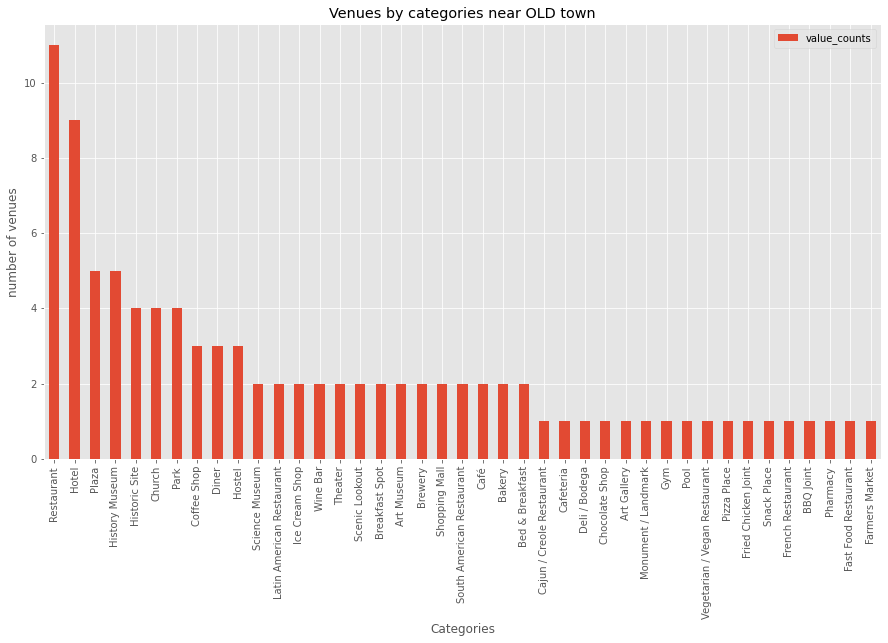

In [45]:
imu_categories_counts.plot(kind='bar', figsize=(15,8))
plt.title('Venues by categories near OLD town')
plt.xlabel('Categories')
plt.ylabel('number of venues')

### SEPARATING BAKERIES, DESSERT SHOPS, CREPERIES, CAFE AND COFFEE SHOPS

In [46]:
imu_categories_df

,categories
0,Church
1,Plaza
2,Hotel
3,Art Gallery
4,Historic Site
5,Plaza
6,Church
7,Hotel
8,Theater
9,Breakfast Spot


In [47]:
SweetBakeriesot= imu_categories_df[imu_categories_df['categories'].str.contains("Bakery|Coffee Shop|Café|Dessert Shop|Pie Shop|Creperies")]

SweetBakeriesot

,categories
11,Bakery
15,Coffee Shop
32,Coffee Shop
42,Coffee Shop
43,Café
49,Bakery
59,Café


In [48]:
Bakot_counts= pd.DataFrame(SweetBakeriesot['categories'].value_counts())
Bakot_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

Bakot_counts.index.name ='Categories'
Bakot_counts.astype('int')
Bakot_counts.sum()

value_counts    7
dtype: int64

## FILTERING AND UNIFYING CATEGORIES

In [49]:
shops = imu_categories_df[imu_categories_df['categories'].str.contains("Bakery|Coffee Shop|Café|Dessert Shop|Pie Shop|Creperies")]

imu_shops_counts= pd.DataFrame(shops['categories'].value_counts())
imu_shops_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

shops.index.name ='Categories'
imu_shops_counts

,value_counts
Coffee Shop,3
Bakery,2
Café,2


## SWEET BAKERIES COUNT IN OLD TOWN

In [51]:
SweetBakeriesot_imu= imu_categories_df[imu_categories_df['categories'].str.contains("Bakery|Coffee Shop|Café|Dessert Shop|Pie Shop|Creperies")]

SweetBakeriesot_imu


imu_Bak_counts= pd.DataFrame(SweetBakeriesot_imu['categories'].value_counts())
imu_Bak_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

imu_Bak_counts.index.name ='Categories'
imu_Bak_counts

,value_counts
Categories,
Coffee Shop,3
Bakery,2
Café,2


In [52]:
imu_Bak_counts['value_counts'].astype('int')
imu_Bak_counts.sum()

value_counts    7
dtype: int64

### As a result we notice that we can find only 7 Sweet Bakeries in Quito Old Town

## CONCLUSION

#### Based on the analyisis of the number of "Sweet Bakeries" in Quito Downtown and Quito Old Town, we noticed that there are 42 in Downtown and only 7 in Old Town. Because Quito is considered as a very turistic city and considering that the Old Town is the place to go for turist and local people we recommend that the best place to open a Sweet Bakery is Old Town. However although the competition is fewer in Old Town there are a lot of business and offices in Downtown and lots of people searching for a nice place to go for Coffee and Sweet pastries. 

#### Utimately and based on the previous analysis of competition and the business opportunity we reccommend to open the Sweet Bakery in Quito Old town.  